# 역전파
학습 과정에서는 역전파 알고리즘을 사용하여 손실 함수의 기울기를 계산한다. 이 기울기는 출력층에서부터 거꾸로 은닉층과 입력층까지 전파된다. 각 층의 가중치는 이 기울기와 학습률을 이용하여 업데이트 된다.

## 오차 역전파 (Backpropagation)
인공신경망에서 가중치와 편향을 학습시키기 위한 알고리즘 중 하나. 손실함수를 최소화하는 가중치와 편향을 찾는 것이 목적이다.<br>
먼저 인공신경망의 출력층에서 계산된 결과값과 실제 결과값 사이의 차이를 측정하는 손실 함수를 정의한다. 손실 함수는 주어진 입력에 대한 출력값과 실제값 사이의 차이를 계산하여 그 값이 최소가 되도록 하는 가중치와 편향을 찾는 것이 목적이다.<br><br>
이후, 역전파 알고리즘을 통해 손실 함수의 값이 최소화 되도록 가중치와 편향을 업데이트 한다. 이 알고리즘은 출력층에서부터 시작하여 입력층까지 역순으로 진행된다.
<br>
즉, 출력층에서부터 역방향으로 가중치와 편향이 각각 어떤 영향을 미치는지를 계산한다. 이후, 이전 층에서 계산된 결과를 다음 층으로 전달하여 이전 층이 가중치와 편향에 대한 gradient를 계산한다. 이러한 과정을 모든 층에서 반복하여 최종적으로 입력층까지 도달한다.<br>
최종적으로 계산된 gradient를 이용해 가중치와 편향을 업데이트하며, 이 과정을 여러번 반복하면서 손실함수의 값이 최소화되도록 가중치와 편향을 조정해나가는 것이 오차 역전파 알고리즘의 핵심이다.

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 인공신경망 간단하게 실습 - 100 epochs마다 산점도 시각화

In [3]:
# 인공신경망 모델 클래스 정의
class SimpleNet(nn.Module):
    """
    이진 분류 문제
    입력층 2개, 은닉층 1개 (노드 수 5), 출력층 1개, (시그모이드 활성화 함수 사용)
    """
    
    def __init__(self):
        super(SimpleNet, self).__init__()          # 부모 클래스에 메서드 호출 하는 방법
        self.fcl = nn.Linear(2,5)   # 입력층 2개, 노드 수 5개
        self.fc2 = nn.Linear(5,1)   # 노드 수 5개, 출력층 1개
        pass
    
    """
    인공신경망 모델 클래스를 정의한다.
    입력층 2개, 은닉층 1개(노드 수 :: 5), 출력층 1개(시그모이드 활성화 함수 사용)로 구성되어 있다.
    """
    
    def forward(self, x) :
        x = torch.relu(self.fcl(x))
        x = torch.sigmoid(self.fc2(x))
        
    """
    self.fc2로 정의되어 있다. 순전파 단계에서는 먼저 self.fc1을 통과한 결과에 ReLU 함수를 적용하고,
    이후 self.fc2를 통과한 결과에 시그모이드 함수를 적용한다.
    """
        
        return x

### 데이터 생성

In [7]:
x = torch.randn(100, 2)
y = ((x[:,0] > 0) & (x[:,1] > 0)).float()
# 입력 데이터 x와 레이블 y를 생성

print(x)
print(y)

tensor([[ 1.9902e+00,  4.1448e-01],
        [-8.0807e-01,  6.9578e-01],
        [-1.2803e+00,  1.2560e+00],
        [ 1.4453e+00,  3.1492e-02],
        [ 1.9227e-01, -8.1484e-01],
        [ 1.0224e+00,  2.4037e+00],
        [-2.0460e-01, -8.2122e-01],
        [-1.3143e+00, -3.6023e-01],
        [-5.2593e-01, -1.4228e+00],
        [-1.2107e+00, -3.9781e-01],
        [ 4.6529e-01, -3.2060e+00],
        [ 1.6502e+00,  4.2746e-01],
        [-1.9952e-01, -4.0206e-01],
        [ 7.1713e-01,  4.0997e-02],
        [-1.6623e+00, -9.5733e-01],
        [ 5.8721e-01, -1.5335e+00],
        [ 1.3845e+00,  3.0961e-01],
        [-6.5028e-01,  8.6715e-01],
        [ 6.2694e-01,  1.0307e+00],
        [-8.7215e-01, -2.3086e+00],
        [ 1.1381e-01, -9.8951e-02],
        [-1.8178e-01,  1.7827e+00],
        [ 9.4483e-01, -8.8152e-01],
        [ 8.2291e-01,  2.5318e-02],
        [ 1.0055e-01, -1.3138e+00],
        [ 1.7201e-02,  2.2773e-01],
        [-4.4720e-01,  5.1382e-01],
        [ 1.5610e+00, -2.970

### 모델 선언

In [8]:
model = SimpleNet()
print(model)

SimpleNet(
  (fcl): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


### loss 함수량 옵티마이저 정의

In [9]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### 학습

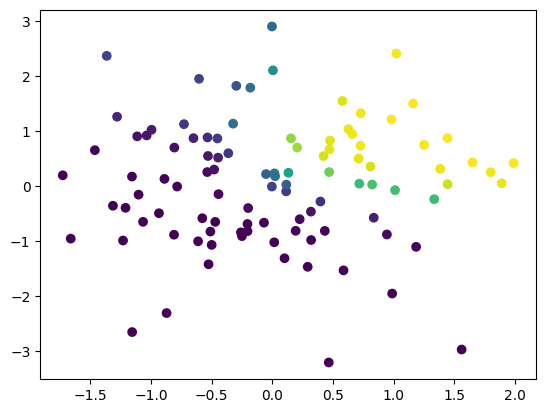

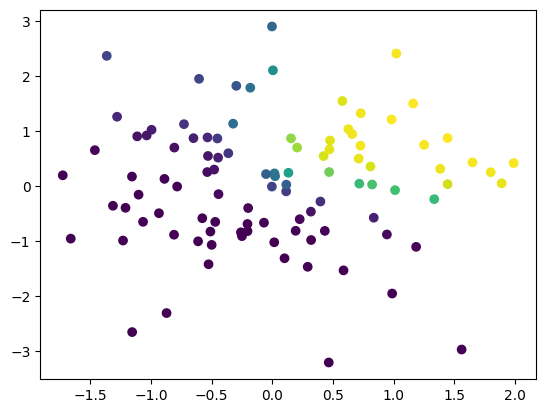

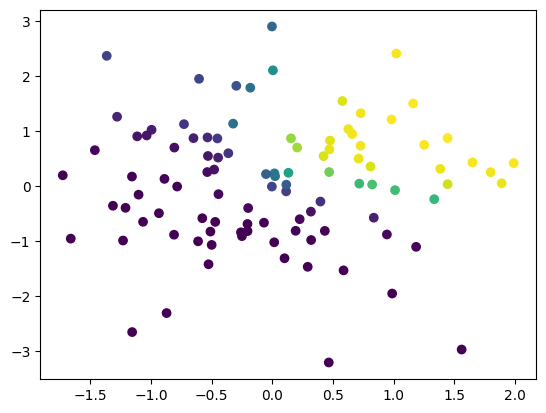

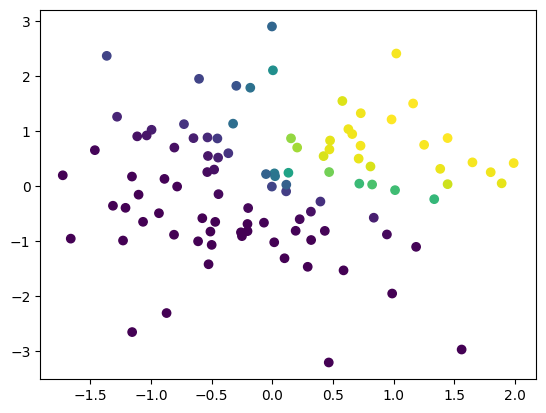

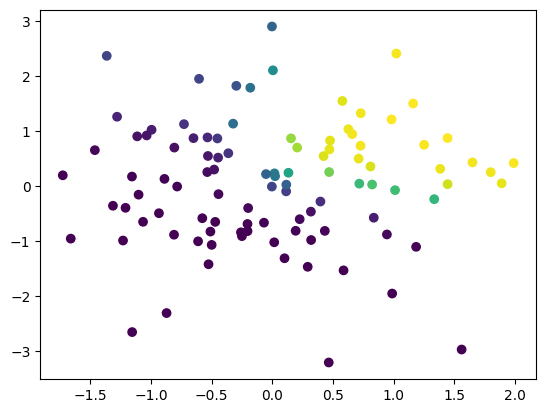

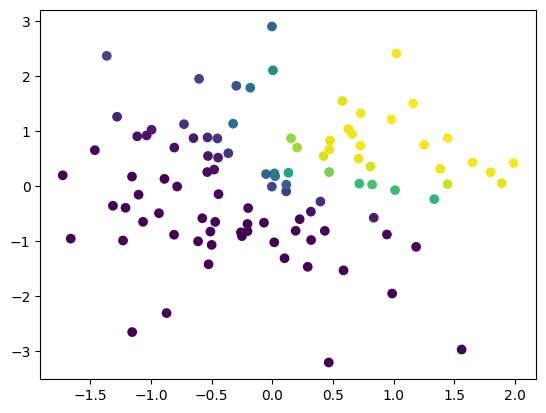

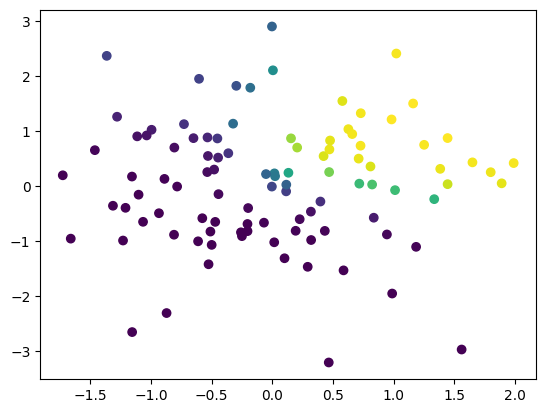

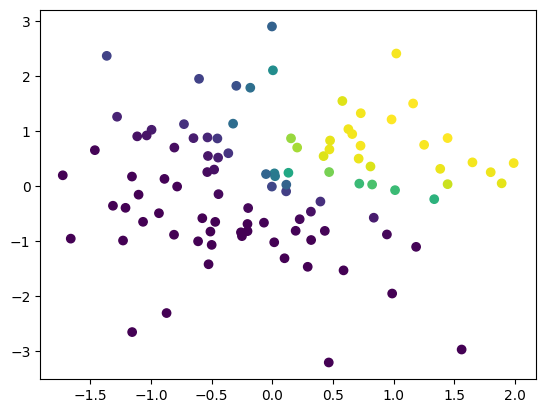

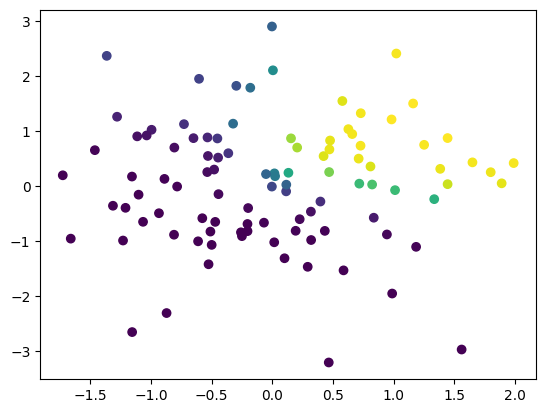

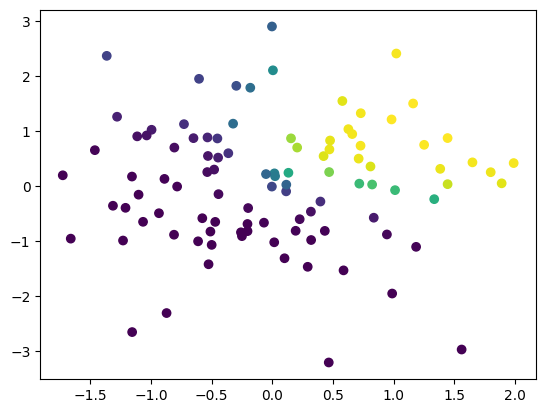

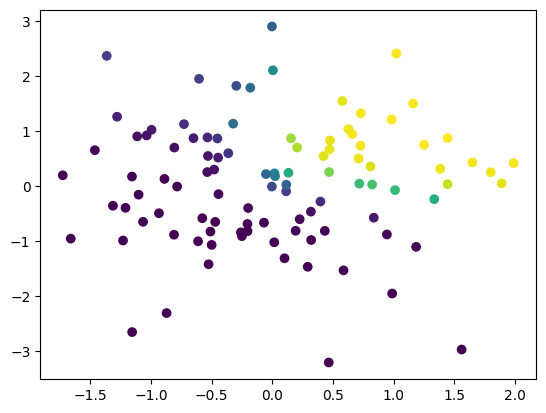

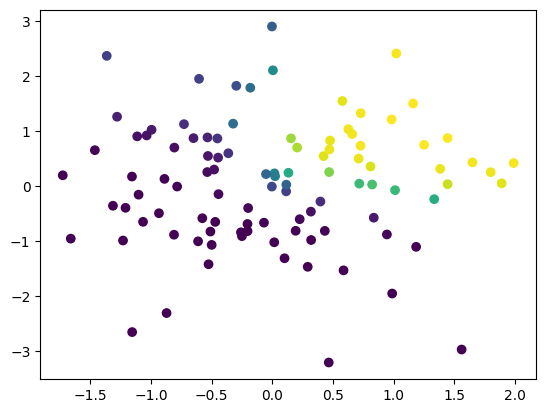

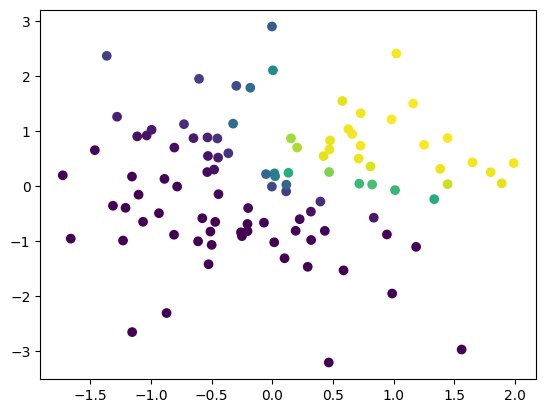

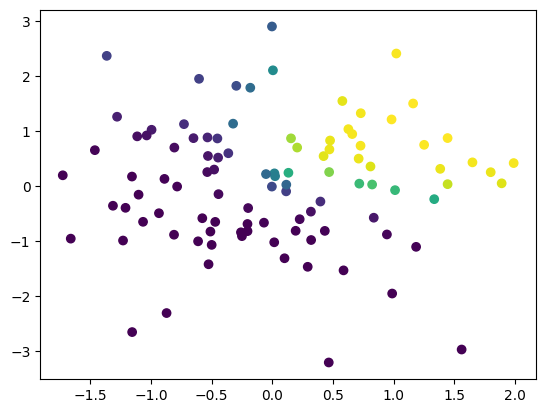

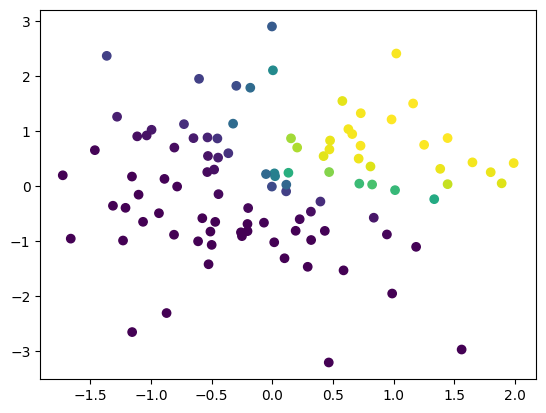

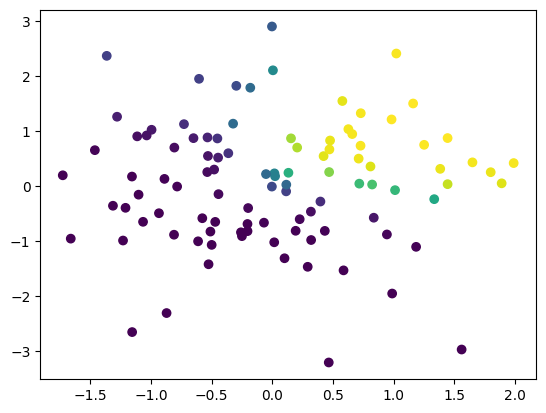

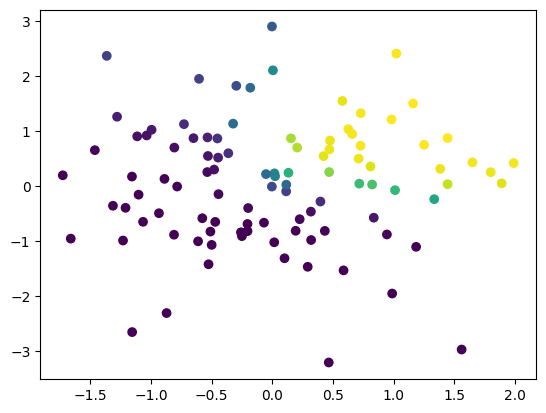

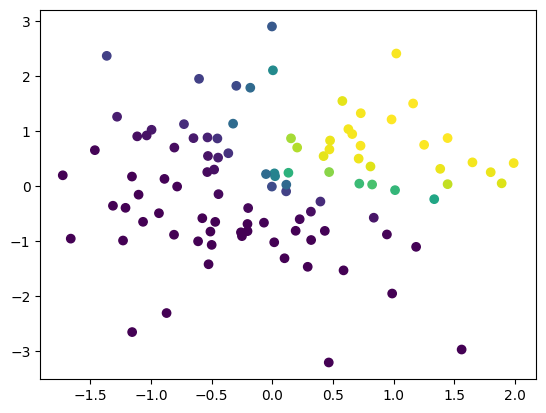

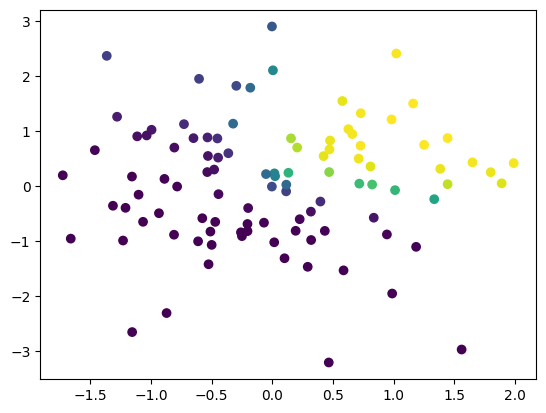

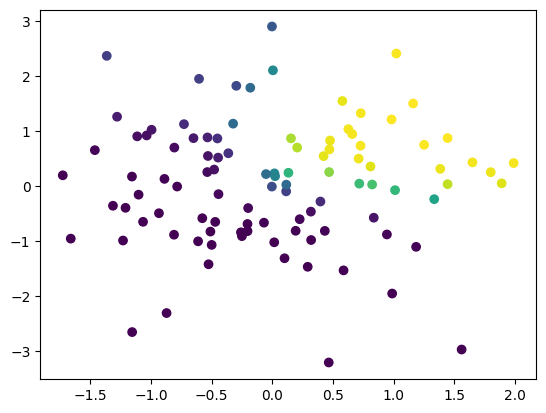

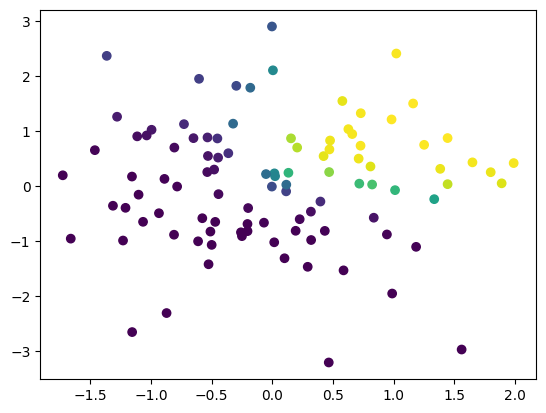

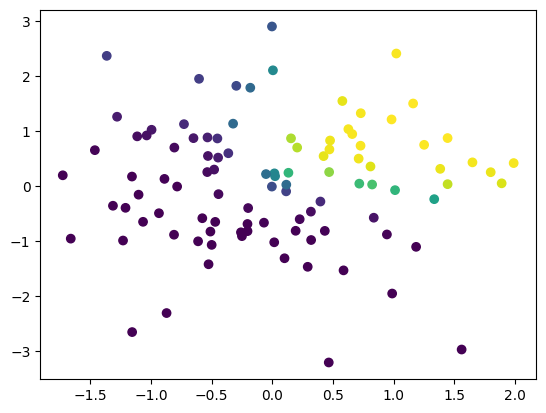

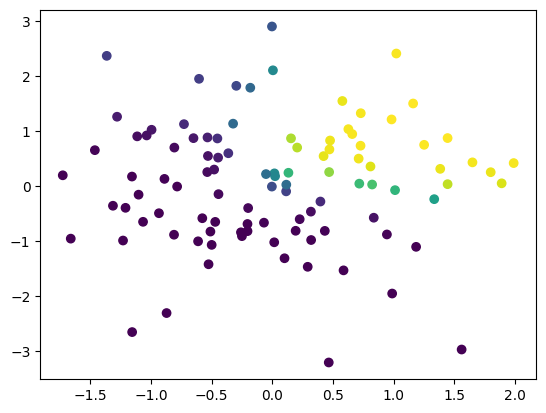

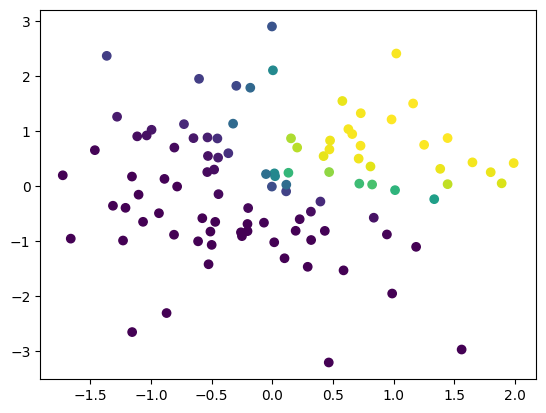

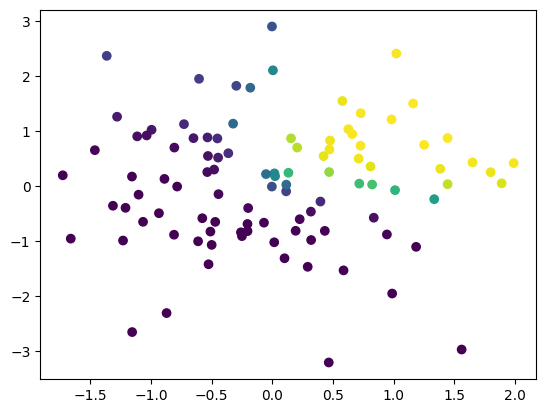

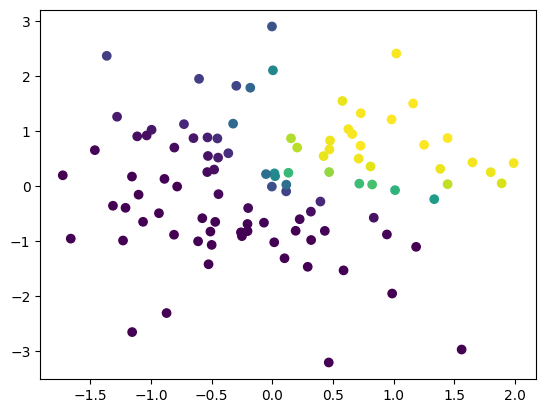

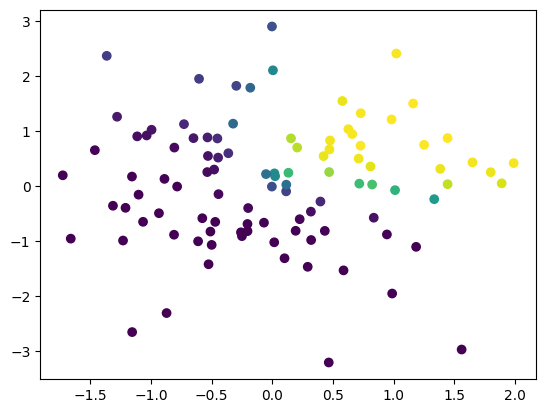

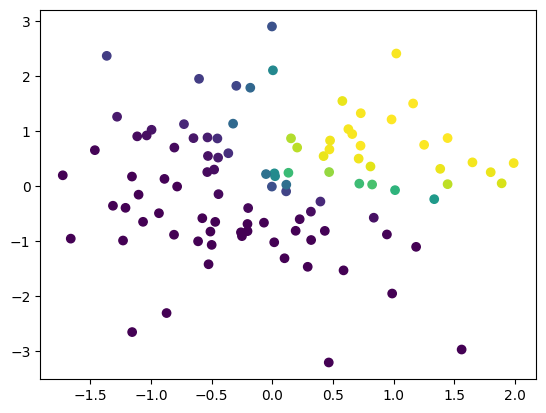

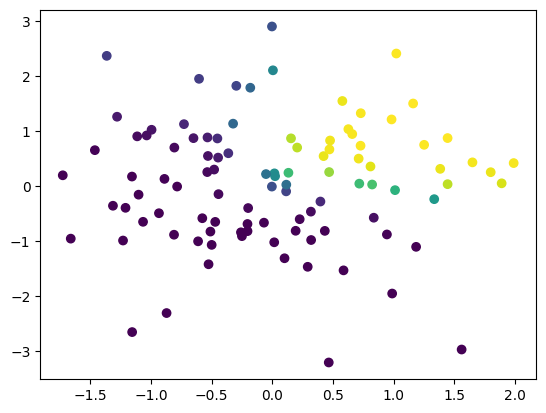

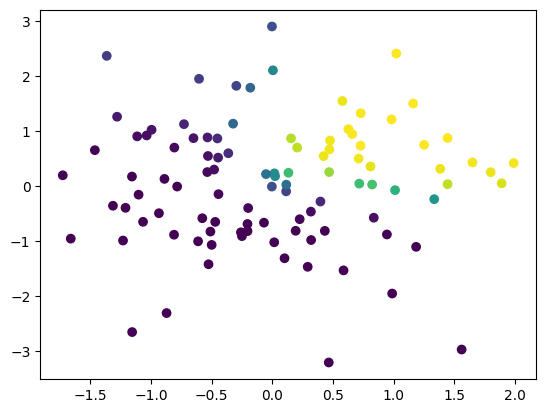

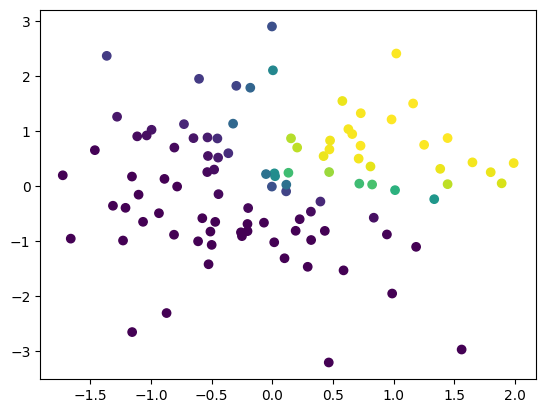

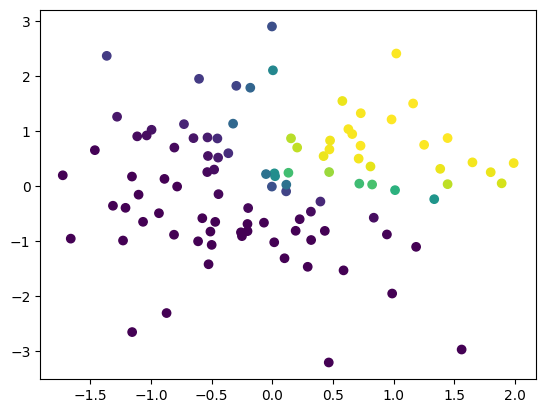

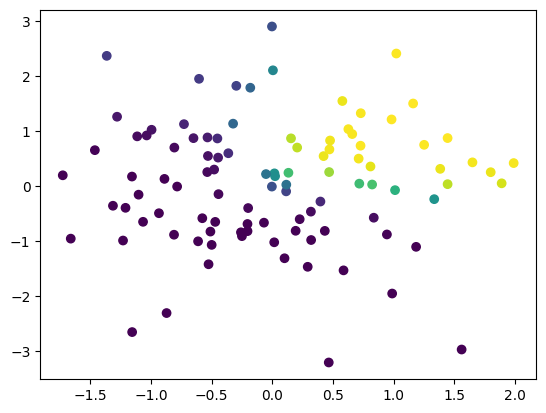

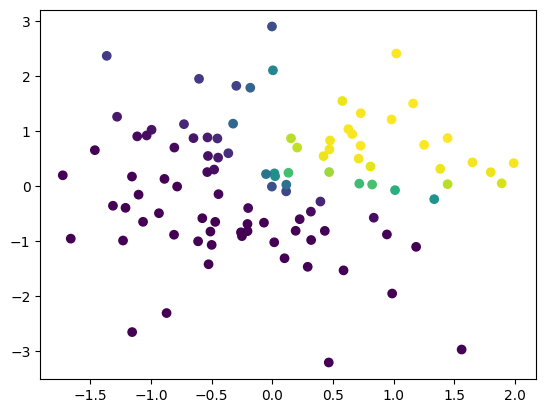

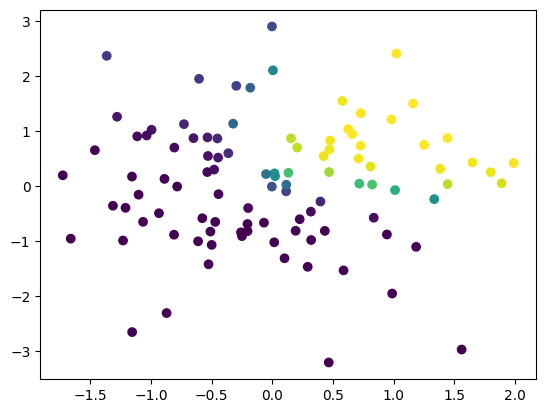

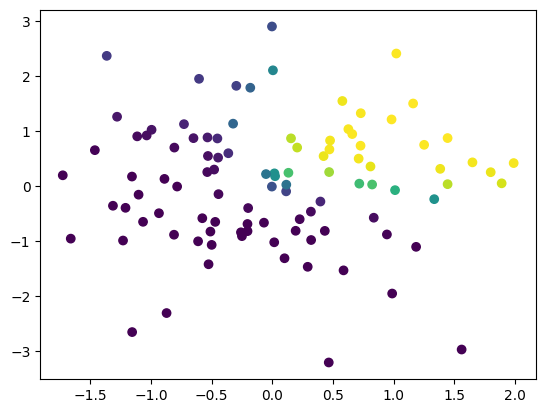

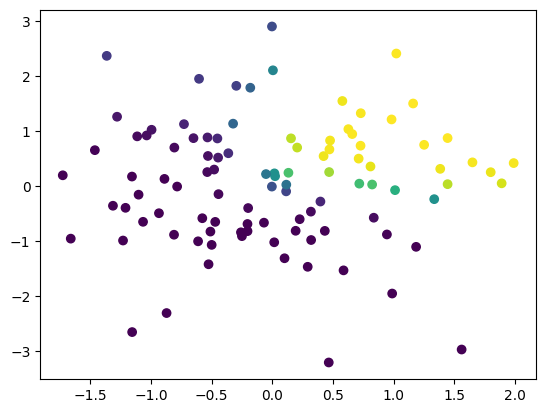

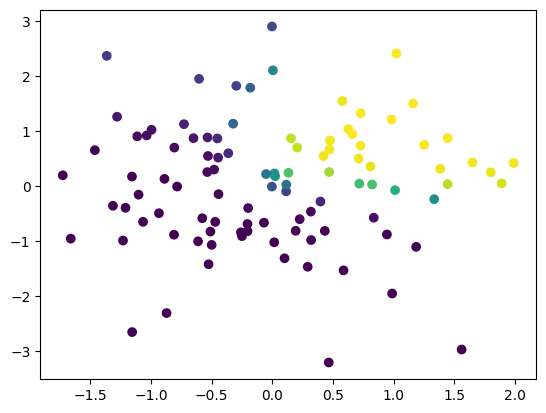

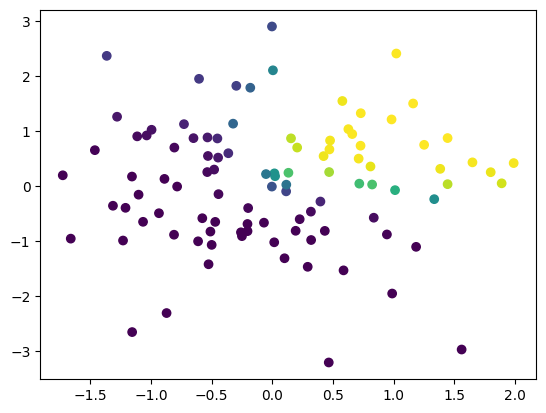

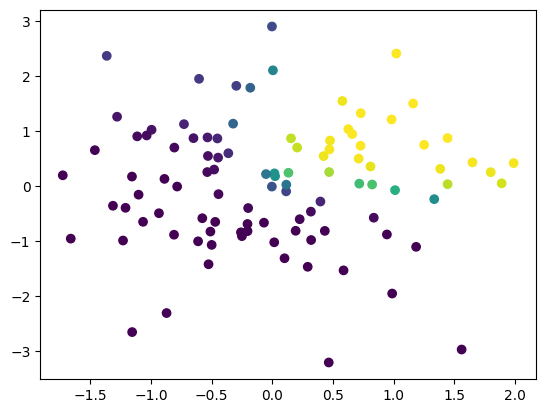

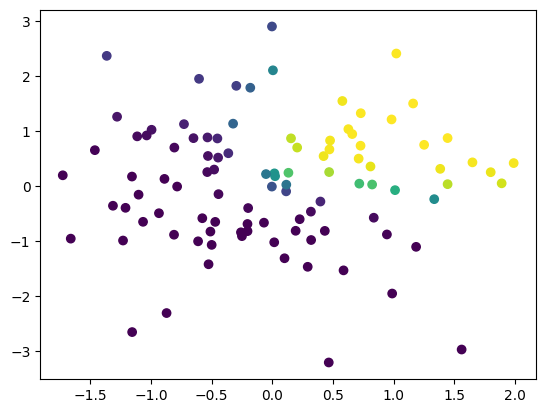

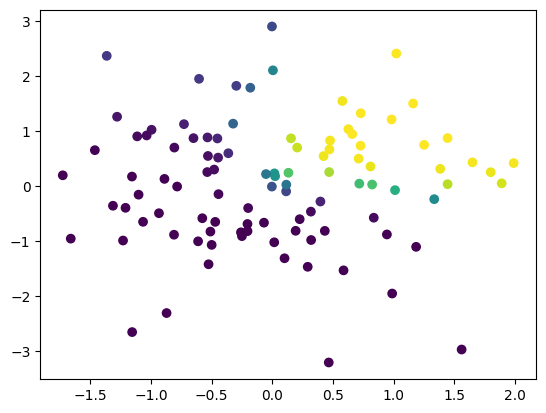

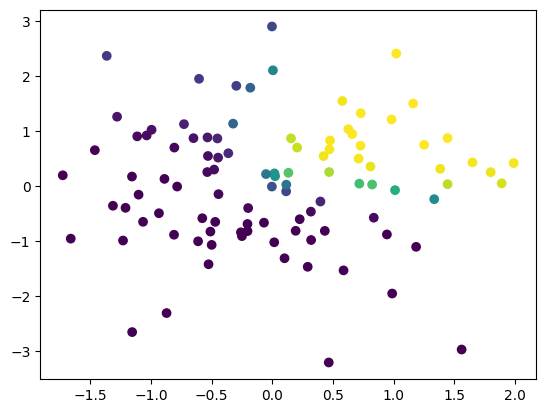

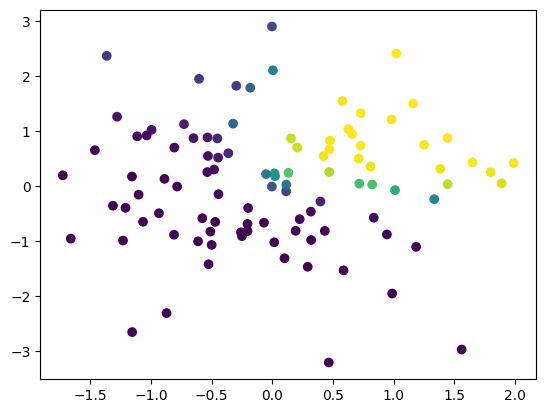

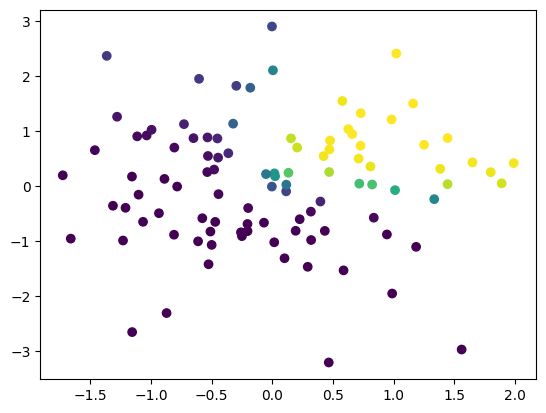

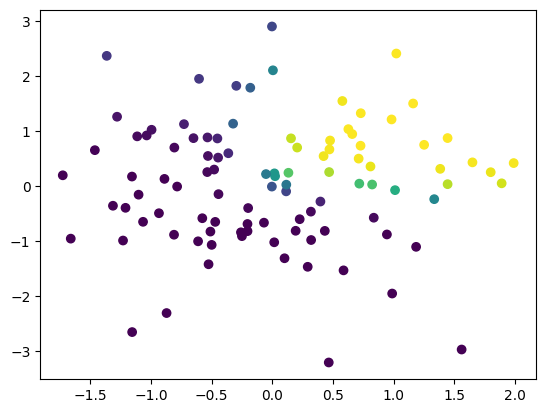

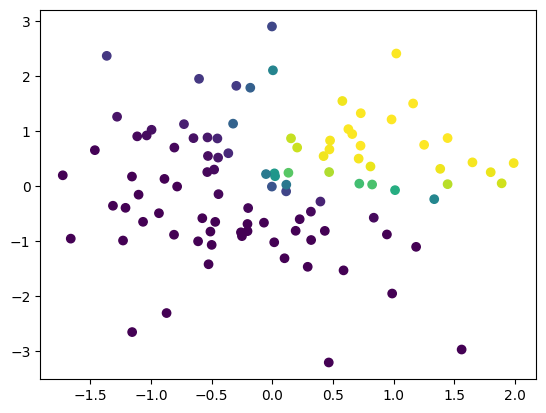

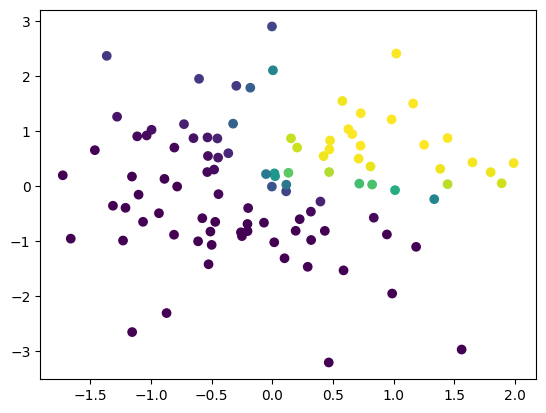

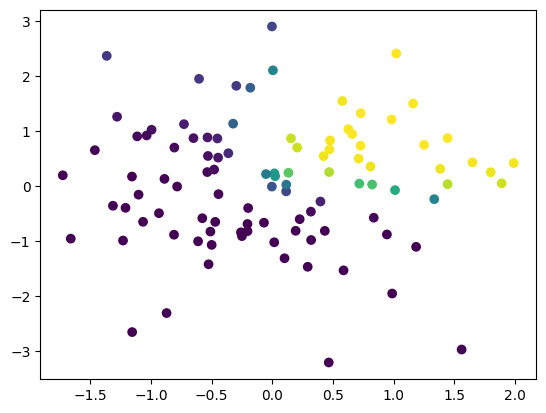

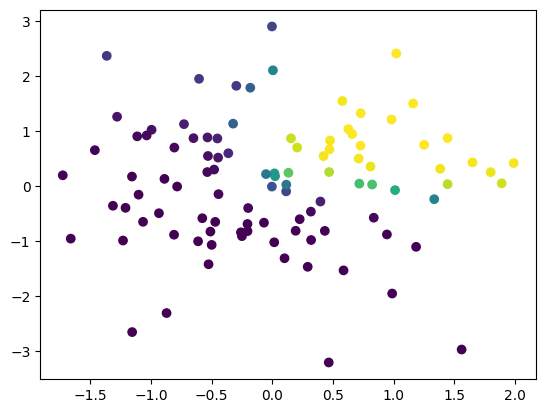

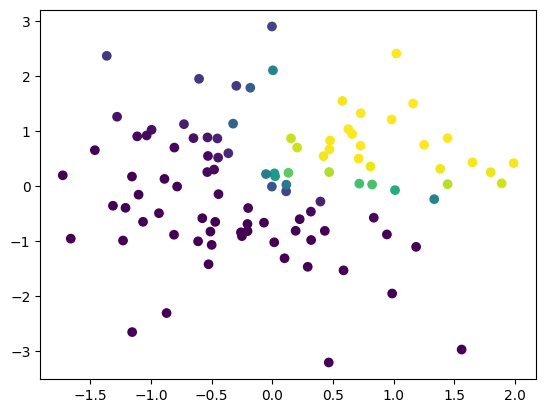

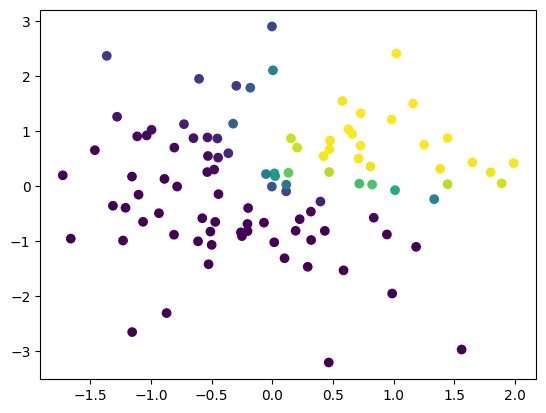

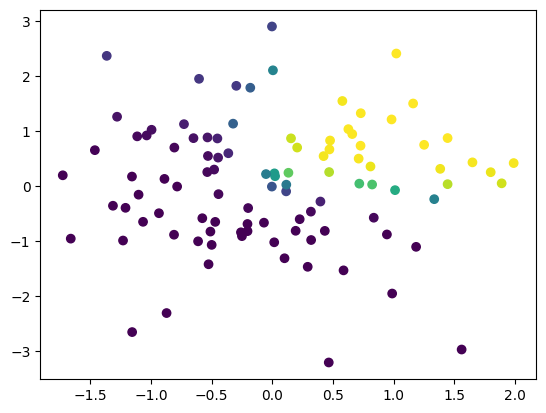

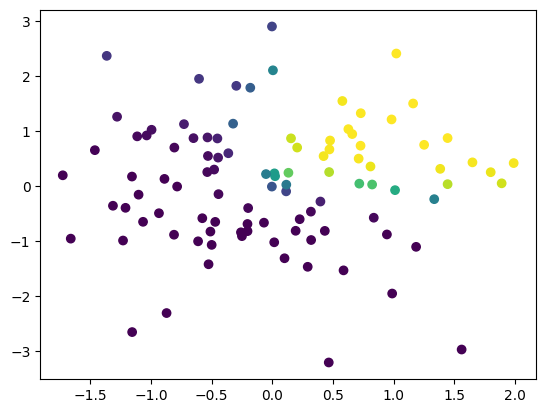

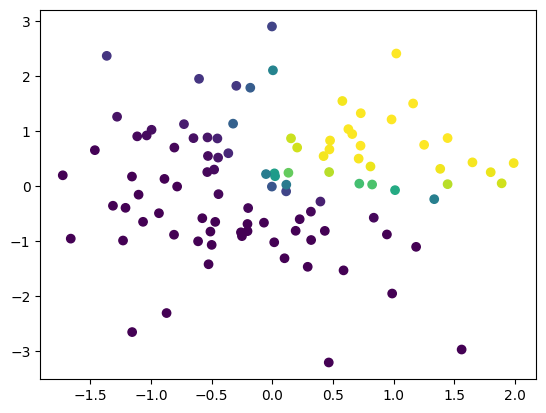

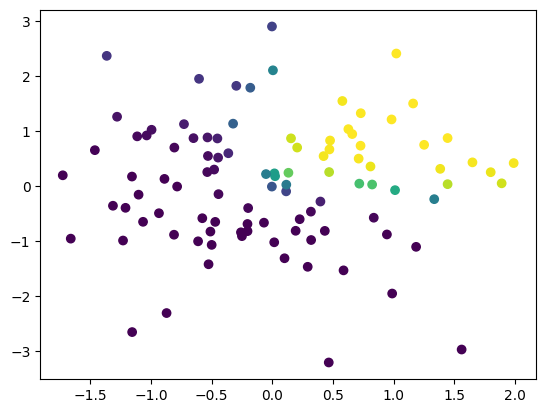

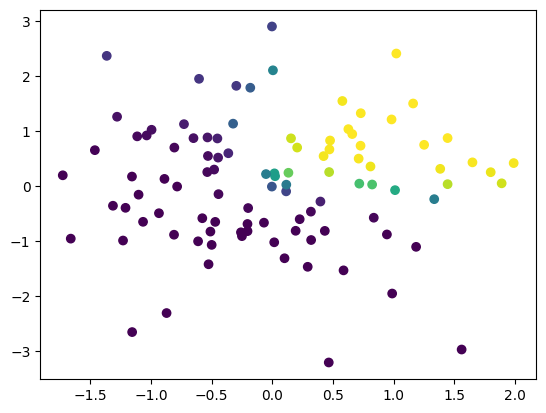

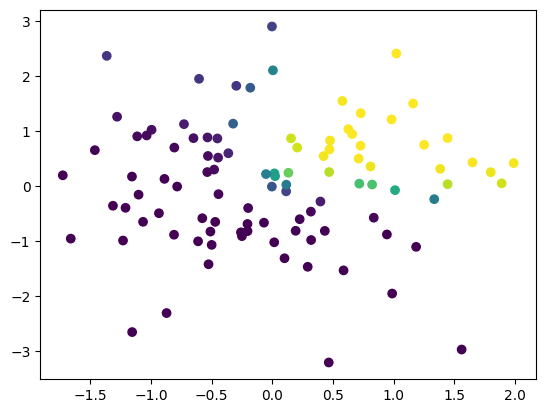

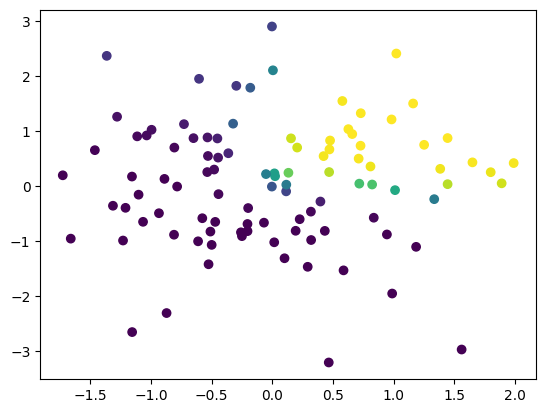

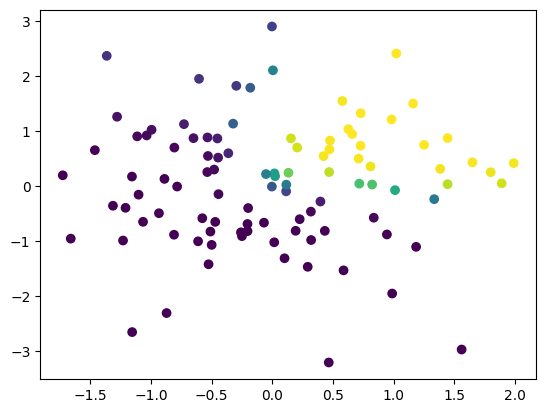

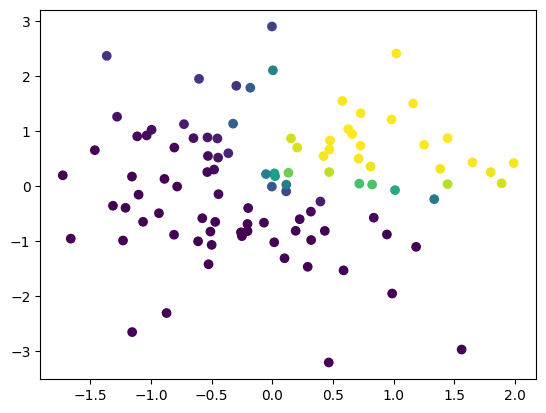

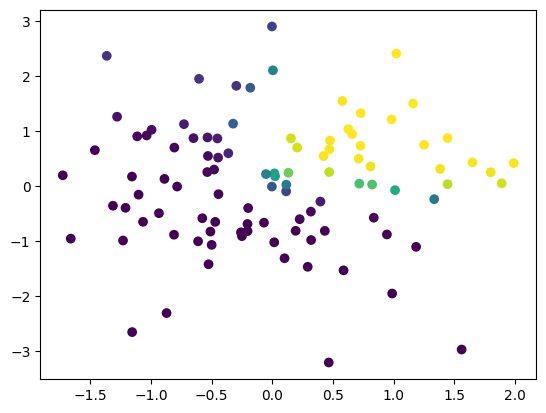

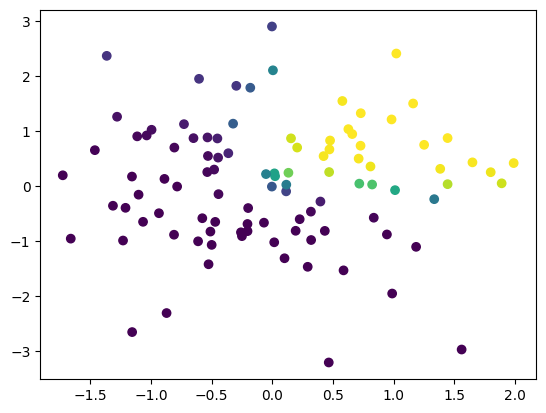

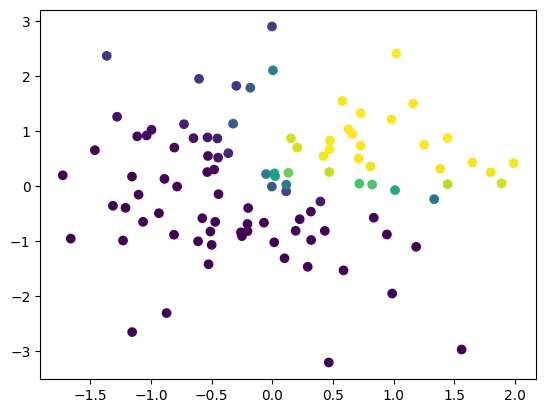

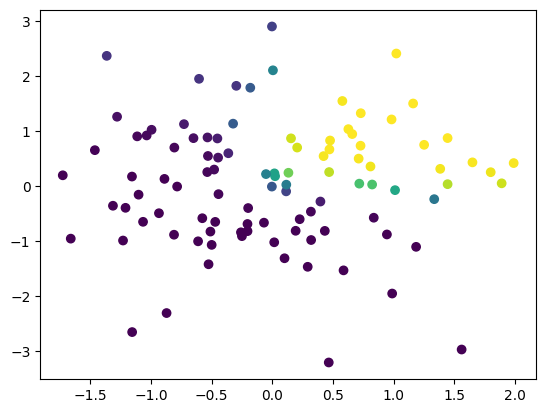

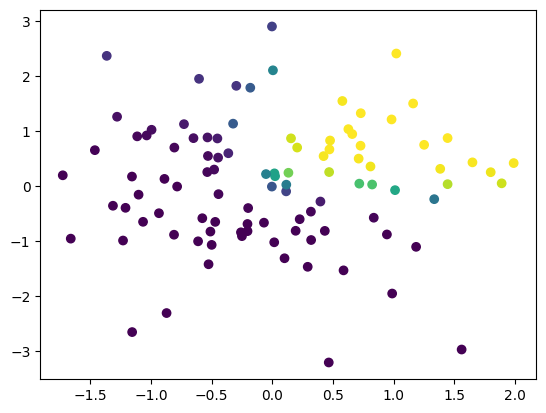

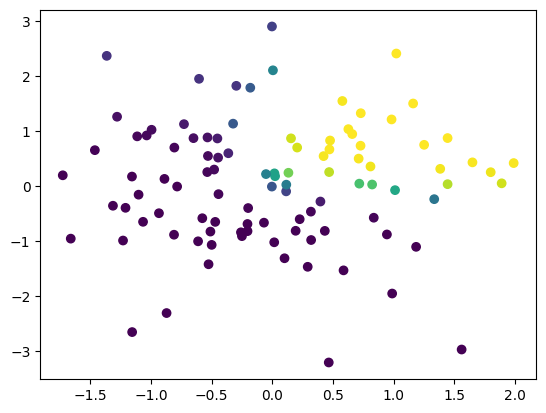

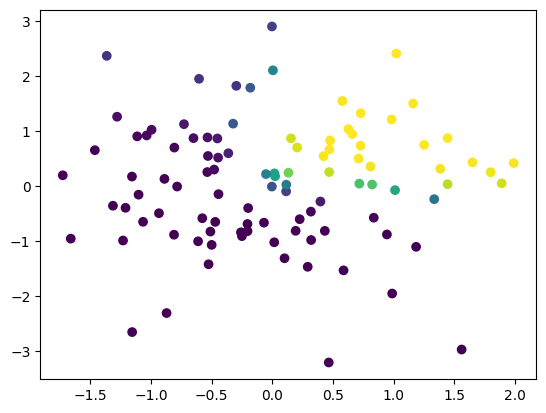

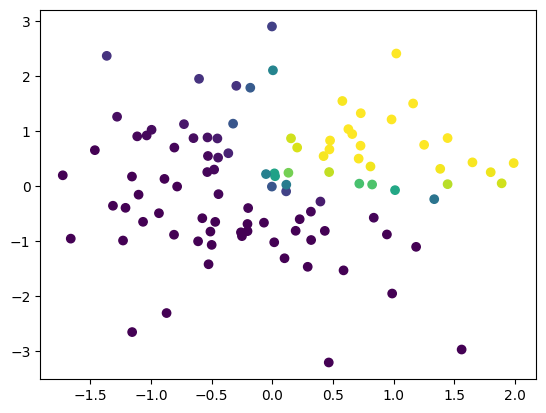

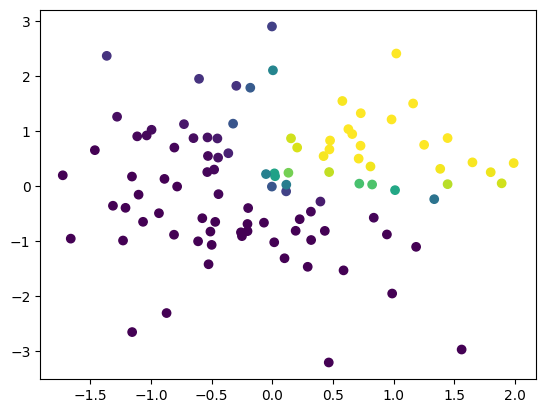

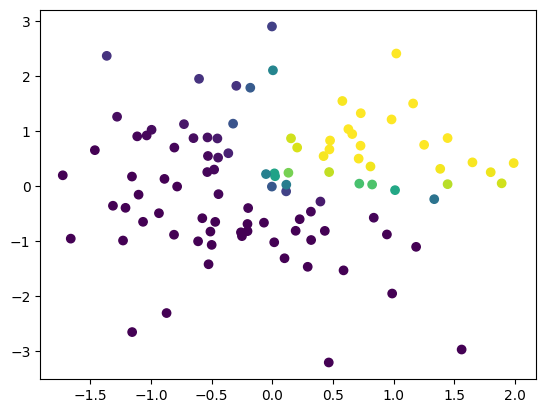

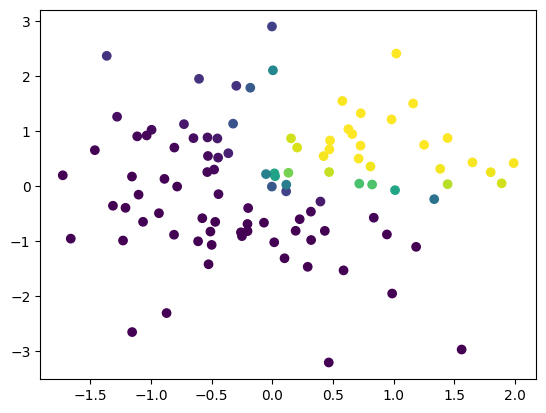

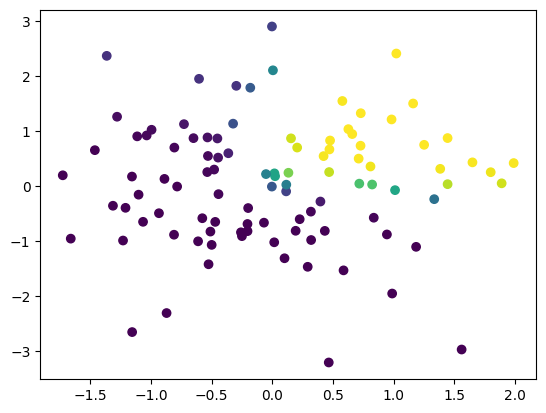

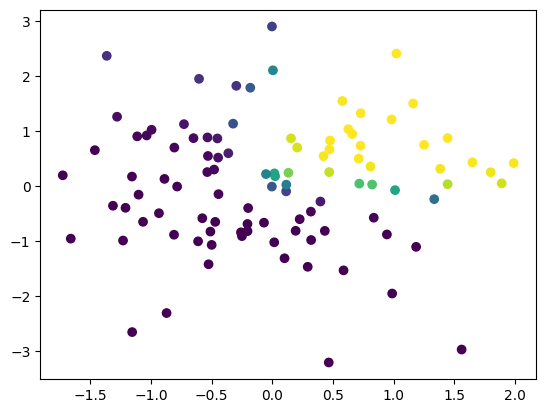

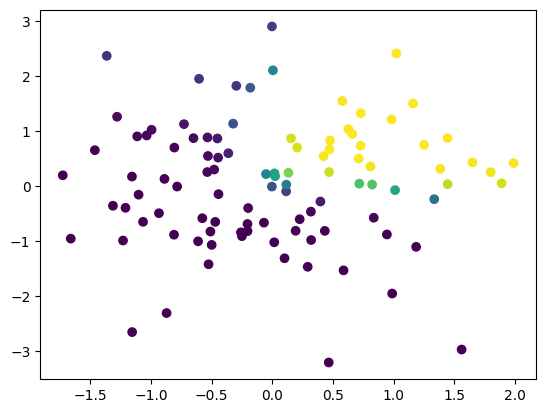

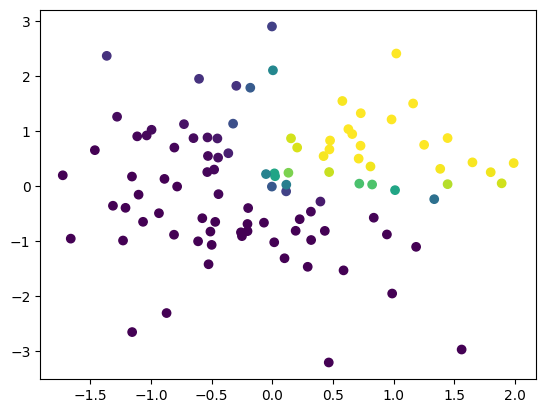

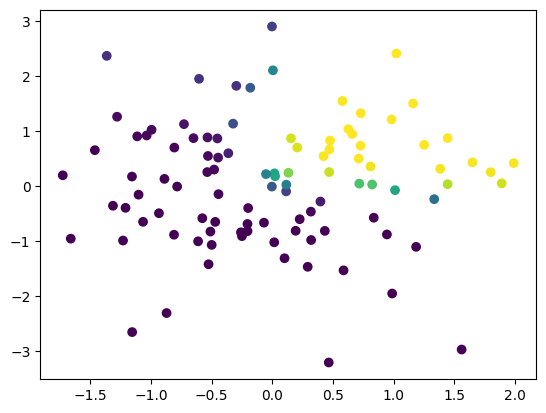

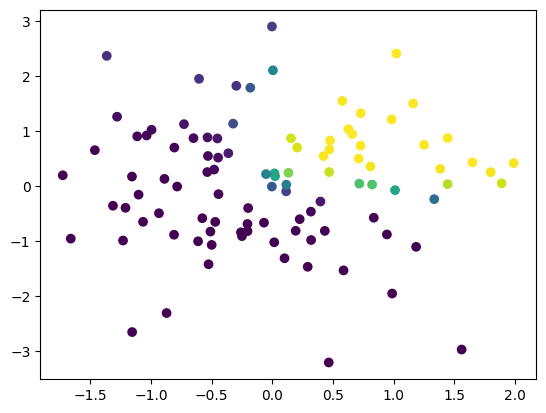

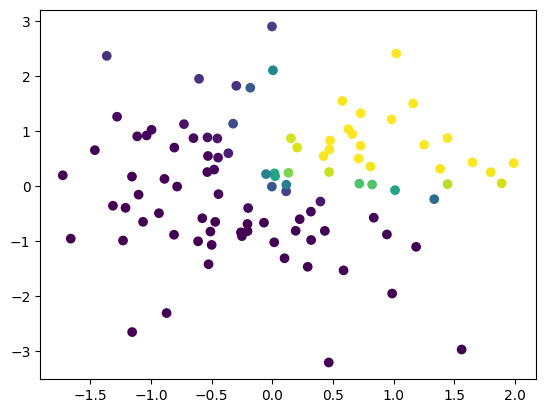

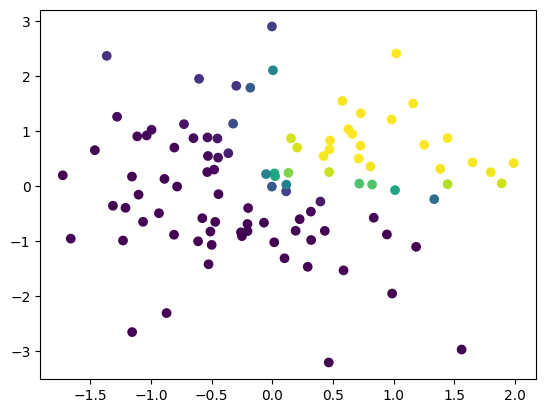

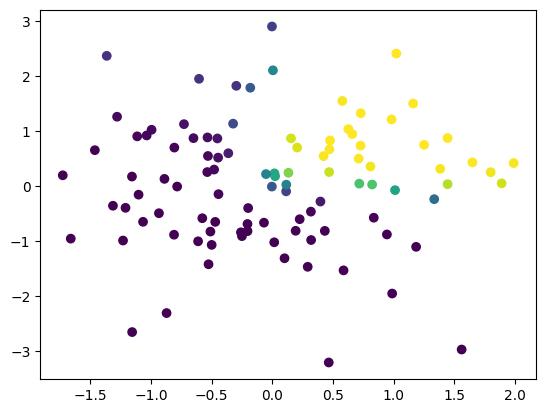

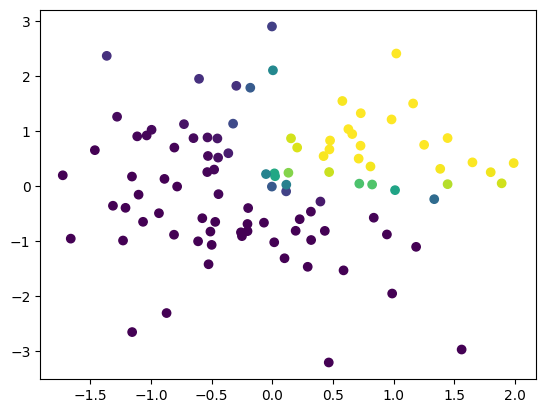

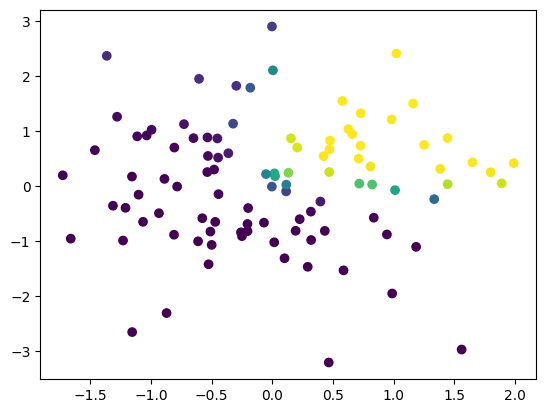

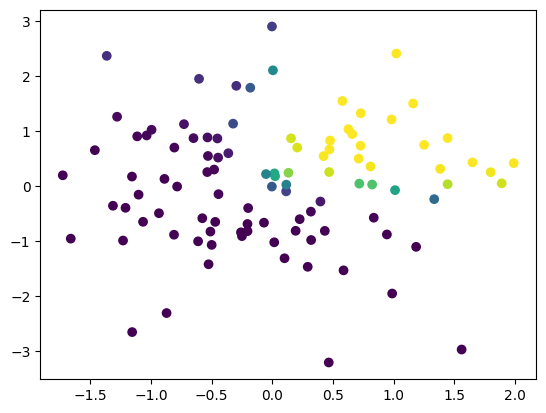

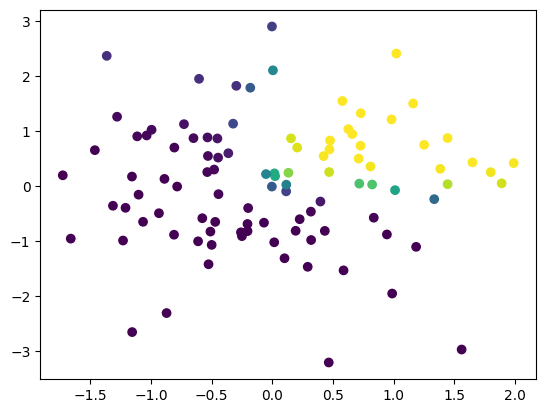

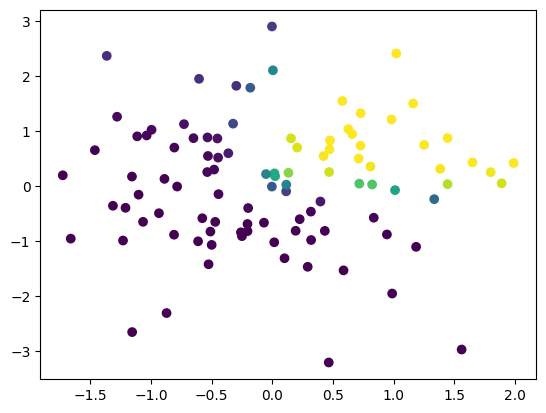

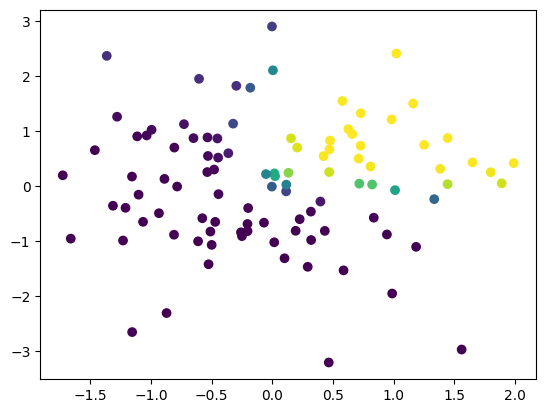

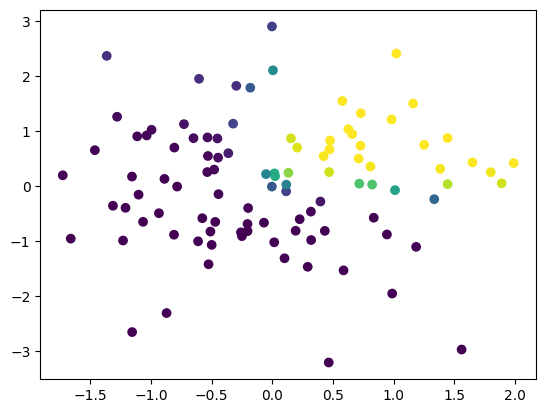

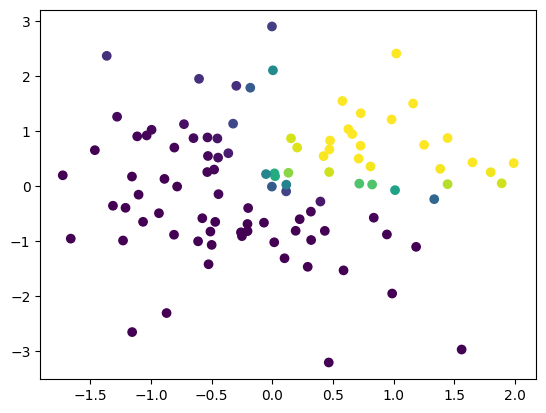

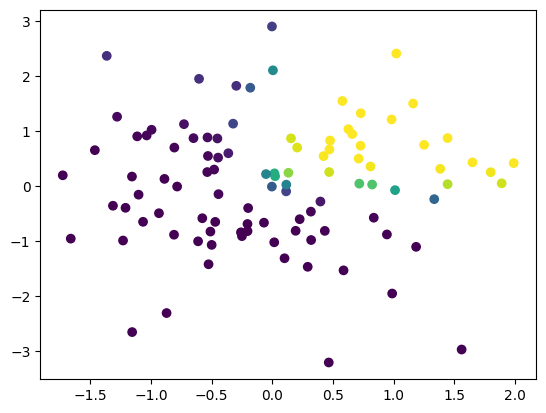

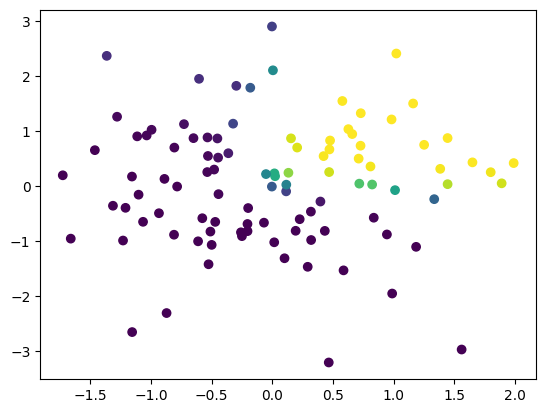

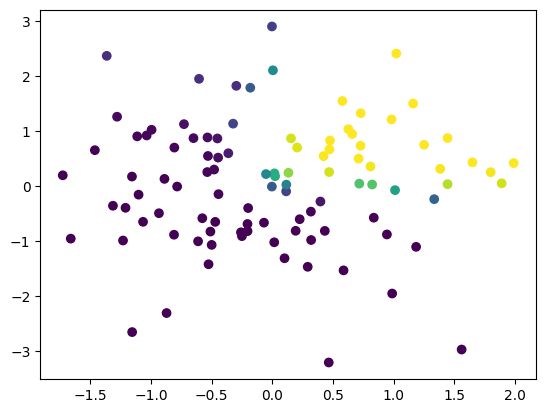

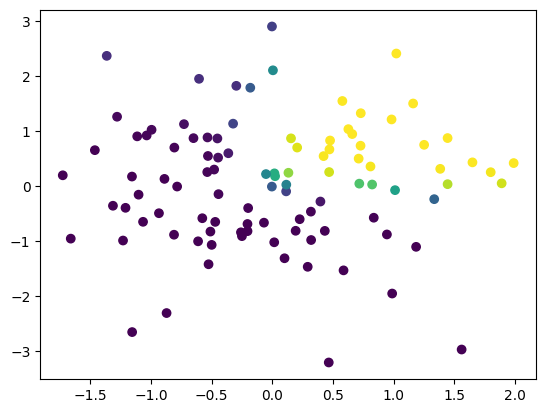

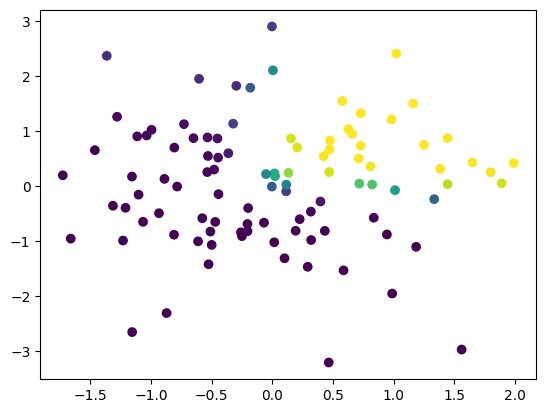

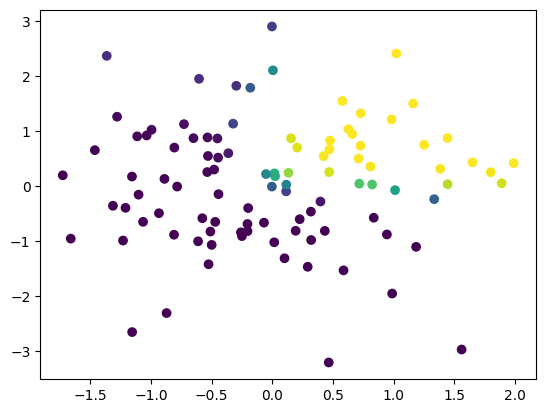

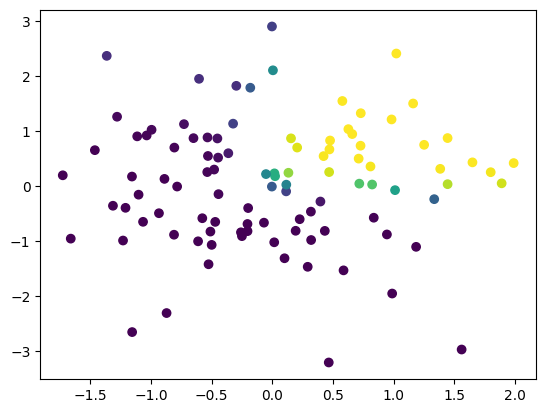

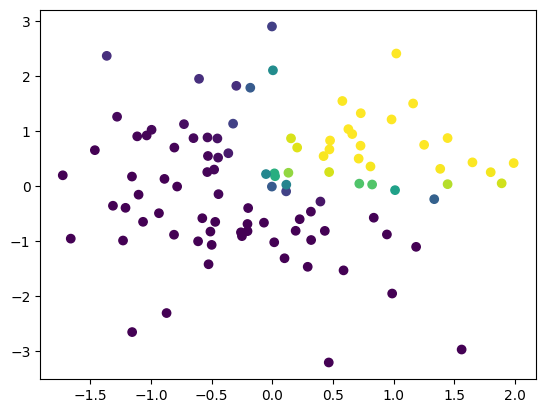

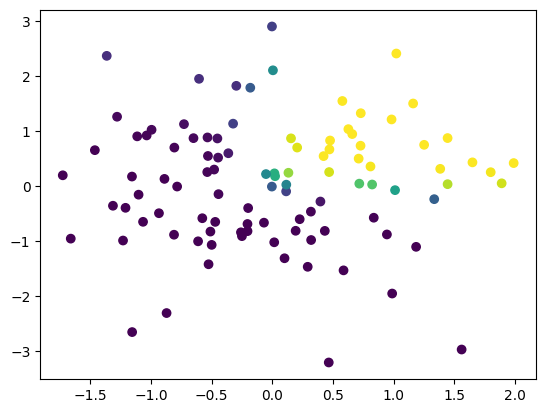

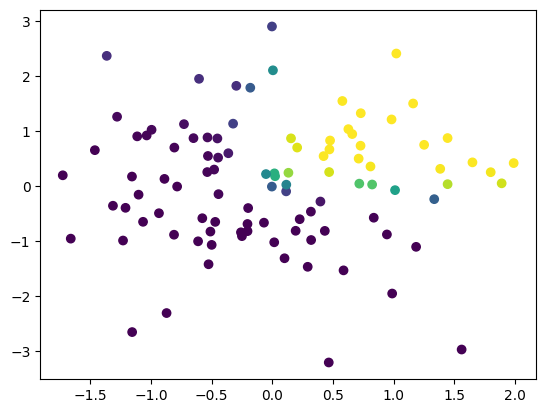

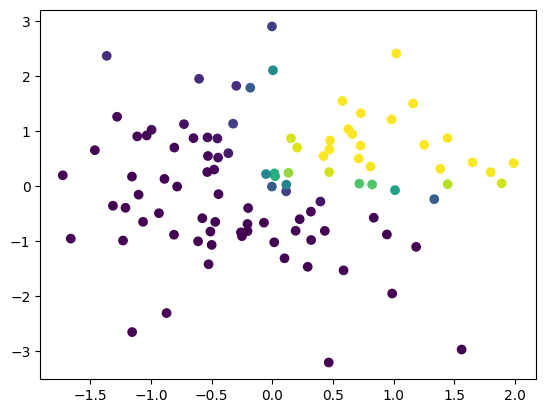

학습 완료 !!!


In [15]:
for epoch in range(1000):
    # 순전파 단계
    y_pred = model(x)
    
    # loss
    loss = criterion(y_pred.squeeze(), y)
    
    # 역전파
    optimizer.zero_grad()    # 옵티마이저의 모든 가중치에 대한 변화 0으로 초기화 => 이전 기울기 값이 남아있을 가능성이 있어서
    loss.backward()          # 손실함수 역전파 수행
    optimizer.step()         # 옵티마이저 가중치 업데이트
    
    if epoch % 10 == 0:
        plt.clf()
        plt.scatter(x[:,0], x[:,1], c=y_pred.detach().numpy().squeeze())
        plt.show()
print("학습 완료 !!!")

산점도의 x축과 y축은 데이터의 두 개의 특성(feature)을 나타내며, 각 점은 데이터 포인트를 나타낸다. 이 데이터는 두 개의 특성을 가지고 있으며, 각 특성은 평균이 0이고 표준편차가 1인 정규분포에서 생성된 것이다.<br>
모델의 출력값에 따라 각 점의 색상이 결정된다. 여기서는 모델이 이진 분류 모델이므로 출력값은 0과 1 사이의 값으로 나타난다.